**Title: Stroke Prediction Classification Model**

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 1. Data Collection
print("Loading data...")
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Loading data...
Dataset Shape: (5110, 12)

First few rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3     

In [5]:
# 2. Data Preprocessing
print("\nPreprocessing data...")
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])


Preprocessing data...


In [6]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [7]:
# Drop ID column
df = df.drop('id', axis=1)

In [8]:
# 3. Exploratory Data Analysis
print("\nPerforming exploratory data analysis...")
plt.figure(figsize=(15, 10))


Performing exploratory data analysis...


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Stroke Cases')

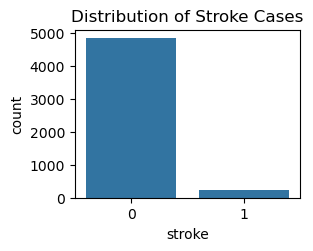

In [9]:
# Distribution of stroke cases
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='stroke')
plt.title('Distribution of Stroke Cases')

Text(0.5, 1.0, 'Age Distribution by Stroke')

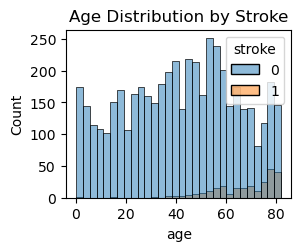

In [10]:
# Age distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='age', hue='stroke', bins=30)
plt.title('Age Distribution by Stroke')

Text(0.5, 1.0, 'Correlation Heatmap')

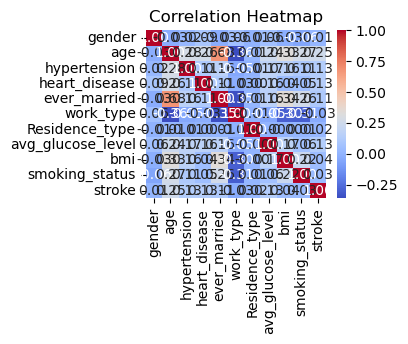

In [11]:
# Correlation heatmap
plt.subplot(2, 2, 3)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'BMI Distribution by Stroke')

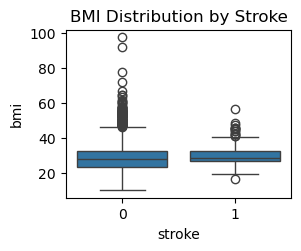

In [12]:
# BMI distribution
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='stroke', y='bmi')
plt.title('BMI Distribution by Stroke')

In [13]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [14]:
# 4. Feature Engineering and Selection
print("\nPreparing features...")
X = df.drop('stroke', axis=1)
y = df['stroke']


Preparing features...


In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# 5. Model Building and Evaluation
print("\nTraining and evaluating models...")
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


Training and evaluating models...


In [18]:
# Dictionary to store results
results = {}
best_accuracy = 0
best_model_name = ''


Training Logistic Regression...
Logistic Regression Accuracy: 0.9393

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
[[960   0]
 [ 62   0]]


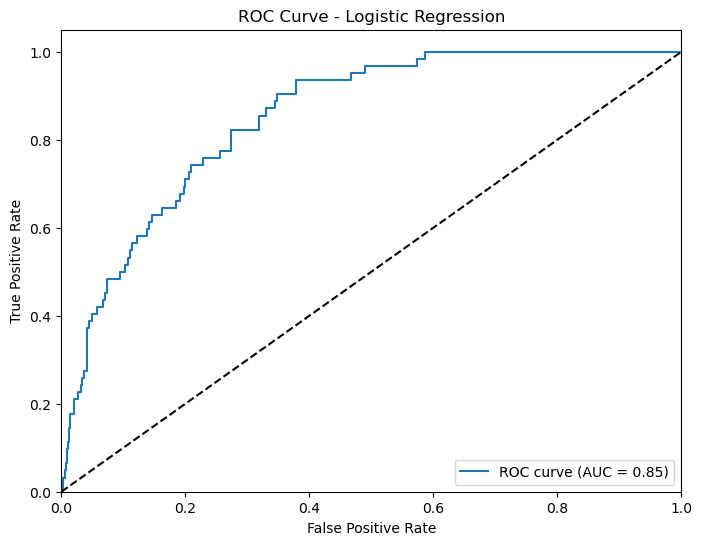


Training Random Forest...
Random Forest Accuracy: 0.9384

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
[[959   1]
 [ 62   0]]


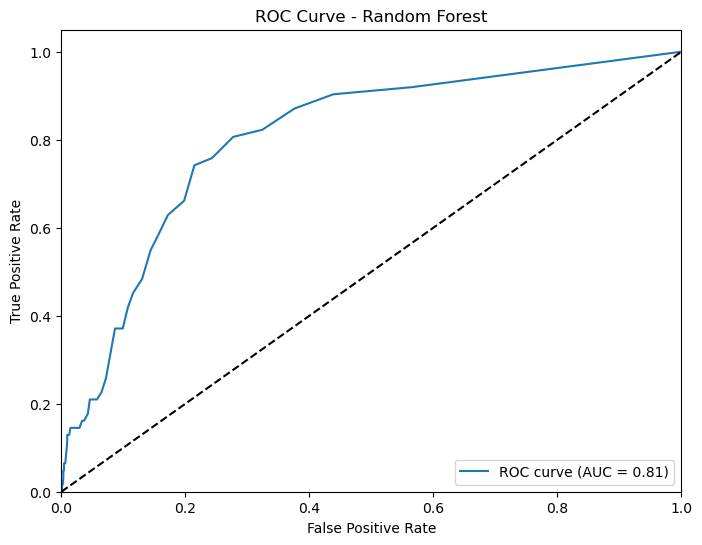


Training SVM...
SVM Accuracy: 0.9393

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
[[960   0]
 [ 62   0]]


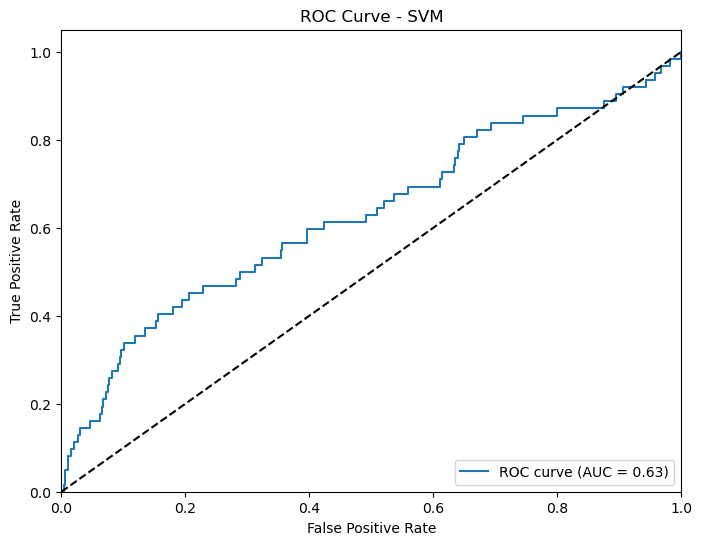


Training KNN...
KNN Accuracy: 0.9393

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
[[960   0]
 [ 62   0]]


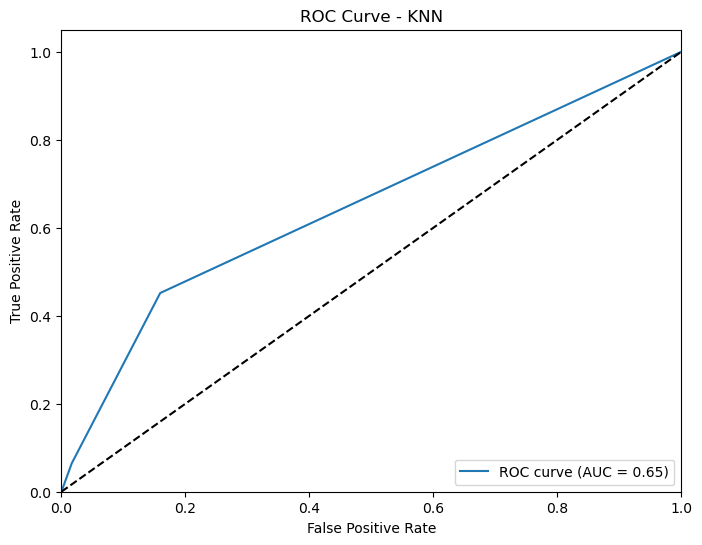


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9384

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022


Confusion Matrix:
[[958   2]
 [ 61   1]]


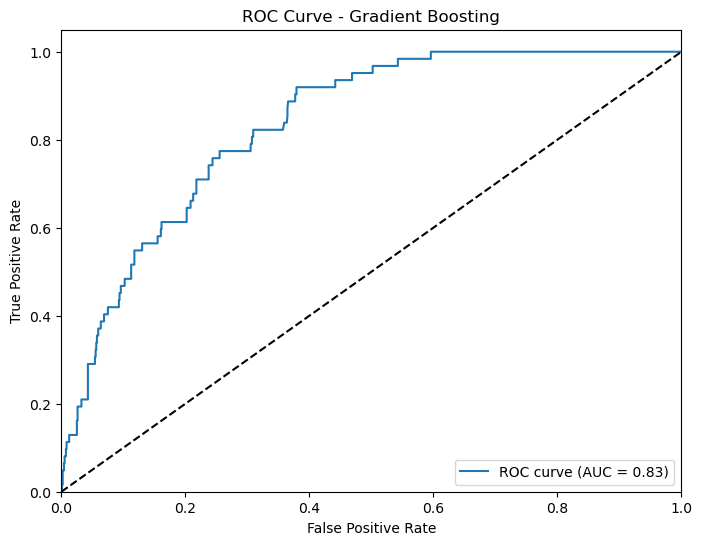

In [19]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': conf_matrix
    }
    
    # Update best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
    
    # Print results
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    
    # Plot ROC curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

In [20]:
# Print best model results
print(f"\nBest performing model: {best_model_name} with accuracy {best_accuracy:.4f}")


Best performing model: Logistic Regression with accuracy 0.9393


In [21]:
# Save best model
import joblib
best_model = results[best_model_name]['model']
joblib.dump(best_model, 'best_stroke_prediction_model.joblib')
print("\nBest model saved as 'best_stroke_prediction_model.joblib'")


Best model saved as 'best_stroke_prediction_model.joblib'


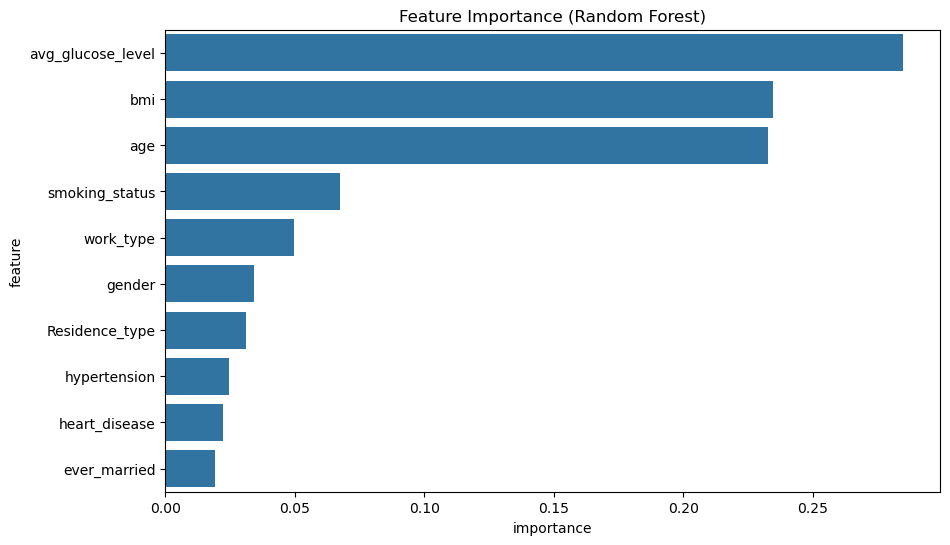

In [22]:
# 6. Feature Importance Analysis (for Random Forest)
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Feature Importance (Random Forest)')
    plt.show()

In [23]:
# 7. Model Comparison Visualization
accuracies = [results[model]['accuracy'] for model in models]
model_names = list(models.keys())

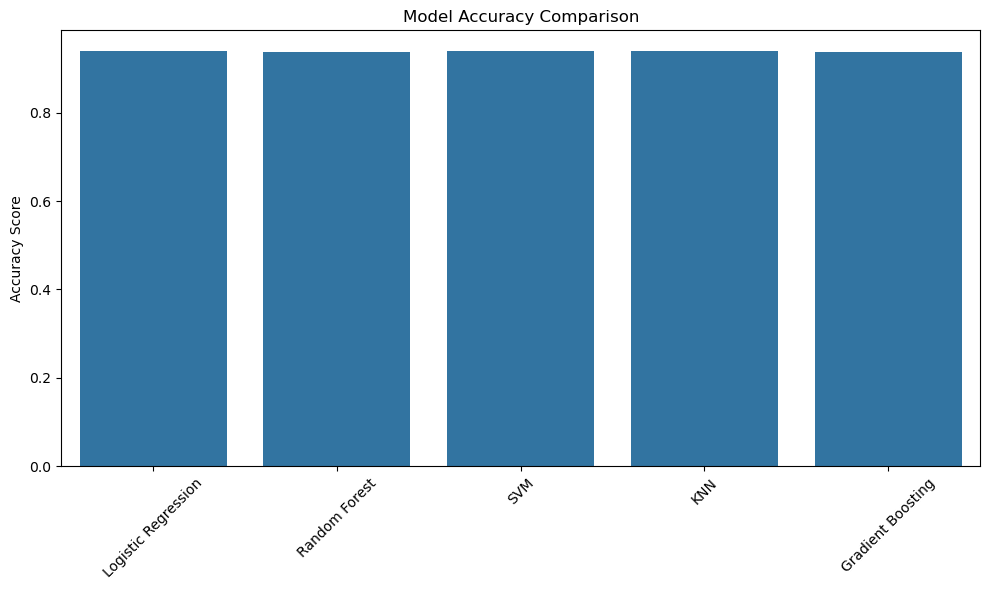

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.show()

In [25]:
# 8. Sample Prediction
print("\nMaking a sample prediction with the best model...")
sample_data = X_test_scaled[0].reshape(1, -1)
prediction = best_model.predict(sample_data)
prediction_proba = best_model.predict_proba(sample_data)
print(f"Sample Prediction: {'Stroke' if prediction[0] == 1 else 'No Stroke'}")
print(f"Prediction Probability: {prediction_proba[0][1]:.4f}")


Making a sample prediction with the best model...
Sample Prediction: No Stroke
Prediction Probability: 0.0069
